In [1]:
#!pip install -r "C:\Users\John\Desktop\requirements.txt"

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Data Collection

In [4]:
#df = pd.read_csv('/kaggle/input/traffic-prediction-dataset/Traffic.csv')
df = pd.read_csv(r"C:\Users\John\Desktop\PR-CL-Traffic_prediction\Traffic.csv")

In [5]:
df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               2976 non-null   object
 1   Date               2976 non-null   int64 
 2   Day of the week    2976 non-null   object
 3   CarCount           2976 non-null   int64 
 4   BikeCount          2976 non-null   int64 
 5   BusCount           2976 non-null   int64 
 6   TruckCount         2976 non-null   int64 
 7   Total              2976 non-null   int64 
 8   Traffic Situation  2976 non-null   object
dtypes: int64(6), object(3)
memory usage: 209.4+ KB


# Cleaning

## Feature conversion to numerical

In [7]:
# col Time
from datetime import datetime

df['Time'] = [pd.to_datetime(x, format='%I:%M:%S %p') for x in df['Time']]
df['Time'] = [x.timestamp() for x in df['Time']]

In [8]:
# col Day of the week
df = pd.get_dummies(df, columns=['Day of the week'], dtype=int)

# Target conversion tu numerical

In [9]:
le = LabelEncoder()
df['Traffic Situation'] = le.fit_transform(df['Traffic Situation'])

In [10]:
df

,Time,Date,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,Day of the week_Friday,Day of the week_Monday,Day of the week_Saturday,Day of the week_Sunday,Day of the week_Thursday,Day of the week_Tuesday,Day of the week_Wednesday
0,-2.208989e+09,10,31,0,4,4,39,2,0,0,0,0,0,1,0
1,-2.208988e+09,10,49,0,3,3,55,2,0,0,0,0,0,1,0
2,-2.208987e+09,10,46,0,3,6,55,2,0,0,0,0,0,1,0
3,-2.208986e+09,10,51,0,2,5,58,2,0,0,0,0,0,1,0
4,-2.208985e+09,10,57,6,15,16,94,3,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2971,-2.208907e+09,9,16,3,1,36,56,3,0,0,0,0,1,0,0
2972,-2.208906e+09,9,11,0,1,30,42,3,0,0,0,0,1,0,0
2973,-2.208905e+09,9,15,4,1,25,45,3,0,0,0,0,1,0,0
2974,-2.208904e+09,9,16,5,0,27,48,3,0,0,0,0,1,0,0


# Univariate Analysis

In [11]:
df.describe()

,Time,Date,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,Day of the week_Friday,Day of the week_Monday,Day of the week_Saturday,Day of the week_Sunday,Day of the week_Thursday,Day of the week_Tuesday,Day of the week_Wednesday
count,2.976000e+03,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.00000,2976.00000,2976.00000
mean,-2.208946e+09,16.000000,68.696573,14.917339,15.279570,15.324933,114.218414,1.994624,0.129032,0.129032,0.129032,0.129032,0.16129,0.16129,0.16129
std,2.494437e+04,8.945775,45.850693,12.847518,14.341986,10.603833,60.190627,1.259307,0.335292,0.335292,0.335292,0.335292,0.36786,0.36786,0.36786
min,-2.208989e+09,1.000000,6.000000,0.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000
25%,-2.208967e+09,8.000000,19.000000,5.000000,1.000000,6.000000,55.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000
50%,-2.208946e+09,16.000000,64.000000,12.000000,12.000000,14.000000,109.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000
75%,-2.208925e+09,24.000000,107.000000,22.000000,25.000000,23.000000,164.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000
max,-2.208903e+09,31.000000,180.000000,70.000000,50.000000,40.000000,279.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.00000


# Bivariate Analysis

In [12]:
# correlation between variables
#sns.set()
#sns.pairplot(df, hue='Traffic Situation', kind='reg')

In [13]:
# correlation with dataset - target value
df.corr()['Traffic Situation']

Time                        -0.125948
Date                         0.008981
CarCount                    -0.748104
BikeCount                   -0.616036
BusCount                    -0.704608
TruckCount                   0.495718
Total                       -0.781925
Traffic Situation            1.000000
Day of the week_Friday      -0.015870
Day of the week_Monday      -0.003133
Day of the week_Saturday     0.016769
Day of the week_Sunday      -0.007113
Day of the week_Thursday     0.007677
Day of the week_Tuesday     -0.000304
Day of the week_Wednesday    0.001147
Name: Traffic Situation, dtype: float64

In [14]:
# full correlation table
df.corr().style.background_gradient(cmap='viridis')

,Time,Date,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,Day of the week_Friday,Day of the week_Monday,Day of the week_Saturday,Day of the week_Sunday,Day of the week_Thursday,Day of the week_Tuesday,Day of the week_Wednesday
Time,1.000000,-0.000000,0.147830,0.140112,0.164964,-0.016984,0.178832,-0.125948,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000
Date,-0.000000,1.000000,-0.013453,-0.005089,-0.015536,0.024734,-0.010679,0.008981,-0.010758,0.118341,0.043033,0.064550,-0.117670,0.088252,-0.166699
CarCount,0.147830,-0.013453,1.000000,0.722539,0.692994,-0.628157,0.970443,-0.748104,0.002154,-0.010637,0.001454,-0.006767,-0.005388,0.009001,0.008961
BikeCount,0.140112,-0.005089,0.722539,1.000000,0.566364,-0.575399,0.797429,-0.616036,0.212538,-0.051833,-0.008135,-0.034198,-0.037505,-0.037932,-0.032455
BusCount,0.164964,-0.015536,0.692994,0.566364,1.000000,-0.546931,0.790705,-0.704608,-0.189665,0.023671,0.019827,0.021505,0.044140,0.030697,0.038788
TruckCount,-0.016984,0.024734,-0.628157,-0.575399,-0.546931,1.000000,-0.555471,0.495718,-0.188024,0.031031,0.035947,0.046631,0.023269,0.007758,0.036798
Total,0.178832,-0.010679,0.970443,0.797429,0.790705,-0.555471,1.000000,-0.781925,-0.031310,-0.008059,0.010429,0.000885,0.002507,0.007441,0.015624
Traffic Situation,-0.125948,0.008981,-0.748104,-0.616036,-0.704608,0.495718,-0.781925,1.000000,-0.015870,-0.003133,0.016769,-0.007113,0.007677,-0.000304,0.001147
Day of the week_Friday,0.000000,-0.010758,0.002154,0.212538,-0.189665,-0.188024,-0.031310,-0.015870,1.000000,-0.148148,-0.148148,-0.148148,-0.168790,-0.168790,-0.168790
Day of the week_Monday,0.000000,0.118341,-0.010637,-0.051833,0.023671,0.031031,-0.008059,-0.003133,-0.148148,1.000000,-0.148148,-0.148148,-0.168790,-0.168790,-0.168790


# Scale

In [15]:
df_scaled = df.copy()
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_scaled),columns=df.columns)
df_scaled['Traffic Situation'] = df['Traffic Situation']
df_scaled.head()

,Time,Date,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,Day of the week_Friday,Day of the week_Monday,Day of the week_Saturday,Day of the week_Sunday,Day of the week_Thursday,Day of the week_Tuesday,Day of the week_Wednesday
0,-1.000000,-0.375,-0.375000,-0.705882,-0.333333,-0.588235,-0.642202,2,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.978947,-0.375,-0.170455,-0.705882,-0.375000,-0.647059,-0.495413,2,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.957895,-0.375,-0.204545,-0.705882,-0.375000,-0.470588,-0.495413,2,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.936842,-0.375,-0.147727,-0.705882,-0.416667,-0.529412,-0.467890,2,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.915789,-0.375,-0.079545,-0.352941,0.125000,0.117647,-0.137615,3,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Balance Data

In [16]:
from sklearn.utils import resample
df['Traffic Situation'].value_counts()

3    1669
0     682
1     321
2     304
Name: Traffic Situation, dtype: int64

In [17]:
!pip install imblearn

In [18]:
from imblearn.over_sampling import SMOTE

# Supposons que df est votre DataFrame
X = df_scaled.drop('Traffic Situation', axis=1)  # Les caractéristiques
y = df_scaled['Traffic Situation']  # La colonne de classe

# Créez un échantillonneur SMOTE
smote = SMOTE(random_state=42)

# Appliquez SMOTE pour équilibrer les données
X_resampled, y_resampled = smote.fit_resample(X, y)

# Créez un nouveau DataFrame avec les données équilibrées
balanced_df = pd.concat([X_resampled, y_resampled], axis=1)

In [19]:
balanced_df['Traffic Situation'].value_counts()

2    1669
3    1669
0    1669
1    1669
Name: Traffic Situation, dtype: int64

# Train/Test

In [20]:
X = balanced_df.drop(columns = 'Traffic Situation')
y = balanced_df['Traffic Situation']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print('Train values shape:', X_train.shape)
print('Test values shape:', X_test.shape)
print('Train target shape:', y_train.shape)
print('Test target shape:', y_test.shape)

Train values shape: (5340, 14)
Test values shape: (1336, 14)
Train target shape: (5340,)
Test target shape: (1336,)


# Model selection (Manual)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import accuracy_score

In [23]:
import mlflow
import mlflow.sklearn
#mlflow server --host 0.0.0.0 --port 5000
#!mlflow ui

In [63]:
# Matrice de confusion
def confusionmatrix():

    from sklearn.metrics import confusion_matrix
    
    conf_mat = confusion_matrix(y_test, y_pred, normalize = 'true')
    plt.figure(figsize = (6,4))
    sns.heatmap(conf_mat, annot=True, cmap="Blues")
    
    # Redéfinissez les étiquettes des axes x et y
    new_xticklabels = le.inverse_transform([0,1,2,3])
    new_yticklabels = le.inverse_transform([0,1,2,3])
    
    plt.xticks(range(len(new_xticklabels)), new_xticklabels)
    plt.yticks(range(len(new_yticklabels)), new_yticklabels)
    
    # Donnez un nom à chaque axe
    plt.xlabel("Classe Prédite")
    plt.ylabel("Classe Réelle")
    
    # Affichez la heatmap
    plt.show()

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] END ..................n_estimators=100, random_state=42; total time=   0.7s
[CV] END ..................n_estimators=100, random_state=42; total time=   0.6s
[CV] END ..................n_estimators=100, random_state=42; total time=   0.6s
[CV] END ..................n_estimators=500, random_state=42; total time=   3.1s
[CV] END ..................n_estimators=500, random_state=42; total time=   3.1s
[CV] END ..................n_estimators=500, random_state=42; total time=   3.1s
Classification modelRF meilleurs paramètres {'n_estimators': 500, 'random_state': 42} train_set Accuracy: 1.00
Classification modelRF test_set Accuracy: 1.00


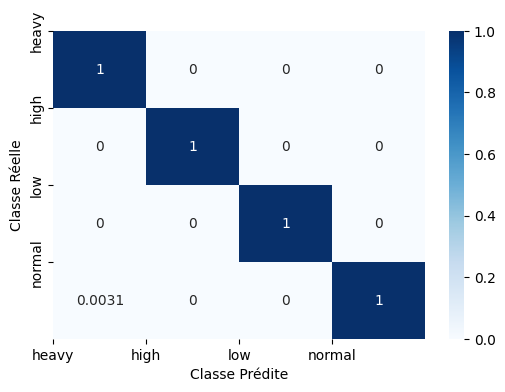

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] END .........................................penalty=l1; total time=   0.0s
[CV] END .........................................penalty=l1; total time=   0.0s
[CV] END .........................................penalty=l1; total time=   0.0s
[CV] END .........................................penalty=l2; total time=   0.0s
[CV] END .........................................penalty=l2; total time=   0.0s
[CV] END .........................................penalty=l2; total time=   0.0s
Classification modelLR meilleurs paramètres {'penalty': 'l2'} train_set Accuracy: 0.92
Classification modelLR test_set Accuracy: 0.93


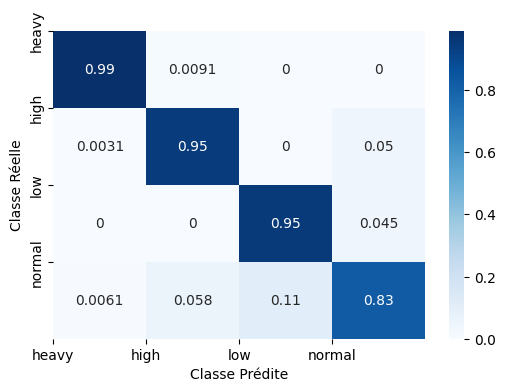

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

models = {'modelRF': (RandomForestClassifier(), {'n_estimators': [100, 500], 'random_state': [42]}),
          'modelLR': (LogisticRegression(), {'penalty': ['l1', 'l2']})}

best_params_dict = {}  # Dictionnaire pour stocker les meilleurs paramètres de chaque modèle
for model in models:
    grid = GridSearchCV(models[model][0], models[model][1], cv=3, verbose=2)
    grid.fit(X_train, y_train)

    # Récupération des meilleurs paramètres
    
    best_params_dict[model] = grid.best_params_

    # Entraînement du modèle avec les paramètres optimum sur tout le train set
    best_grid = grid.best_estimator_

    # Prédiction
    y_pred_train = best_grid.predict(X_train)
    y_pred = best_grid.predict(X_test)

    # Performance
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred)
    
    print('Classification {} meilleurs paramètres {} train_set Accuracy: {:.2f}'.format(model,grid.best_params_,train_accuracy))
    print('Classification {} test_set Accuracy: {:.2f}'.format(model, test_accuracy))

    confusionmatrix()

    # Enregistrement des modèles dans mlflow
    with mlflow.start_run():
        mlflow.log_params(best_params_dict[model])
    
        mlflow.sklearn.log_model(best_grid, model)
    
        mlflow.log_metrics({'train accuracy': train_accuracy, 'test accuracy':test_accuracy})
    mlflow.end_run()

# SHAP values

In [27]:
import shap
shap.initjs()

In [28]:
train_pipe = balanced_df.drop(columns='Traffic Situation')
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(train_pipe)

In [29]:
#Plot1 -
#Parameters=
#explainer.expected_value[2] = the base value w.r.t the class 2
#shap_values[2][435] = the shap value w.r.t to the 2 class and 436th observation
#X_train_df.iloc[43,:] = values of the 44th observation from the training dataset

idx = 87
lab = 2
base_valu = explainer.expected_value[lab]
shap_valu = shap_values[lab][idx]
featur = np.array(train_pipe.iloc[idx,:])
print('idx :',idx)
print('label : ',lab)
print('classe : ', le.inverse_transform([lab]))
print('features',featur)
print('probas : ',model.predict_proba(X.loc[[idx]]))
print('base_value : ',base_valu)
print('shape values : ',shap_valu)

shap.force_plot(base_value=base_valu,
                shap_values=shap_valu,
                features=featur,
                feature_names=train_pipe.columns)#,link="logit") 

idx : 87
label :  2
classe :  ['low']
features [ 0.83157895 -0.375      -0.125       0.52941176  0.33333333 -0.23529412
 -0.04587156  0.          0.          0.          0.          0.
  1.          0.        ]
probas :  [[0.   0.01 0.04 0.95]]
base_value :  0.24750374531835204
shape values :  [-2.73102402e-02 -6.24915650e-03  3.83582919e-02 -2.05907052e-02
 -3.32564272e-01  1.03969940e-01  6.20651718e-02 -1.47575993e-02
 -1.72131883e-03  7.20885789e-04  1.17081723e-04 -7.65447732e-05
 -1.01248095e-02  6.59529721e-04]


# Comparison with other models

In [31]:
import mlflow
logged_model = 'runs:/7143edf4506c4ad3bf0d9a48593f2de6/random_forest_model'

# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(logged_model)

# Predict on a Pandas DataFrame.
import pandas as pd
loaded_model.predict(pd.DataFrame(X))

array([2, 2, 2, ..., 2, 2, 2])

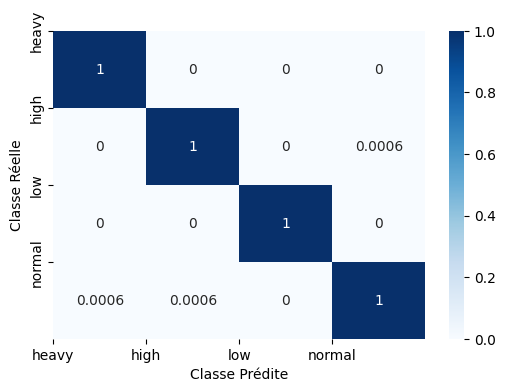

In [32]:
# Matrice de confusion (données de validation)
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y, loaded_model.predict(pd.DataFrame(X)), normalize = 'true')
plt.figure(figsize = (6,4))
sns.heatmap(conf_mat, annot=True, cmap="Blues")

# Redéfinissez les étiquettes des axes x et y
new_xticklabels = le.inverse_transform([0,1,2,3])
new_yticklabels = le.inverse_transform([0,1,2,3])

plt.xticks(range(len(new_xticklabels)), new_xticklabels)
plt.yticks(range(len(new_yticklabels)), new_yticklabels)

# Donnez un nom à chaque axe
plt.xlabel("Classe Prédite")
plt.ylabel("Classe Réelle")

# Affichez la heatmap
plt.show()

In [61]:
#!mlflow server --host 0.0.0.0 --port 5000

^C
